### $\color{blue}{\text{Dados Esparsos}}$

#### $\color{red}{\text{O que são dados esparsos?}}$
Dados esparsos são dados que possuem principalmente elementos não utilizados (elementos que não carregam nenhuma informação).

Pode ser um array como este:

`[1, 0, 2, 0, 0, 3, 0, 0, 0, 0, 0, 0]`

>Dados Esparsos: é um conjunto de dados onde a maioria dos valores dos itens é zero.

>Dense Array: é o oposto de um array esparso, a maioria dos valores não é zero.

Na computação científica, quando estamos lidando com derivadas parciais em álgebra linear, encontraremos dados esparsos.

#### $\color{red}{\text{Como usar dados esparsos}}$

O SciPy possui um módulo **scipy.sparse** que fornece funções para lidar com dados esparsos.

Existem basicamente dois tipos de matrizes esparsas:

- CSC: Coluna Esparsa Comprimida. Para aritmética eficiente, fatiamento de coluna rápido.

- CSR: Linha Esparsa Comprimida. Para fatiamento de linha rápido, produtos vetoriais de matriz mais rápidos

#### $\color{red}{\text{Matriz de CSR}}$

Podemos criar uma matriz CSR passando um array para função **scipy.sparse.csr_matrix()**.

Exemplo: (Criar uma matriz CSR a partir de uma matriz)

In [2]:
import numpy as np
from scipy.sparse import csr_matrix

arr = np.array([0, 0, 0, 0, 0, 1, 1, 0, 2])

print(csr_matrix(arr))

  (0, 5)	1
  (0, 6)	1
  (0, 8)	2


A partir do resultado podemos ver que existem 3 itens com valor.

O 1º item está na posição `0` da linha `5` e tem o valor `1`.

O 2º item está na posição `0` da linha `6` e tem o valor `1`.

O 3º item está na posição `0` da linha `8` e tem o valor `2`.


#### $\color{red}{\text{Métodos de matriz esparsa}}$
Visualizando dados armazenados (não os itens zero) com a propriedade **data**.

Exemplo:

In [3]:
import numpy as np
from scipy.sparse import csr_matrix

arr = np.array([[0, 0, 0], [0, 0, 1], [1, 0, 2]])

print(csr_matrix(arr).data)

[1 1 2]


Contando diferentes zeros com o método **count_nonzero()**.

Exemplo:

In [4]:
import numpy as np
from scipy.sparse import csr_matrix

arr = np.array([[0, 0, 0], [0, 0, 1], [1, 0, 2]])

print(csr_matrix(arr).count_nonzero())

3


Removendo zero-entradas da matriz com o método **eliminate_zeros()**.

Exemplo:

In [5]:
import numpy as np
from scipy.sparse import csr_matrix

arr = np.array([[0, 0, 0], [0, 0, 1], [1, 0, 2]])

mat = csr_matrix(arr)
mat.eliminate_zeros()

print(mat)

  (1, 2)	1
  (2, 0)	1
  (2, 2)	2


Eliminando entradas duplicadas com o método **sum_duplicates()**.

Exemplo:

In [6]:
import numpy as np
from scipy.sparse import csr_matrix

arr = np.array([[0, 0, 0], [0, 0, 1], [1, 0, 2]])

mat = csr_matrix(arr)
mat.sum_duplicates()

print(mat)

  (1, 2)	1
  (2, 0)	1
  (2, 2)	2


Convertendo de csr para csc com o método **tocsc()**.

Exemplo:

In [7]:
import numpy as np
from scipy.sparse import csr_matrix

arr = np.array([[0, 0, 0], [0, 0, 1], [1, 0, 2]])

newarr = csr_matrix(arr).tocsc()

print(newarr)

  (2, 0)	1
  (1, 2)	1
  (2, 2)	2


> Além das operações específicas esparsas mencionadas, as matrizes esparsas suportam todas as operações que as matrizes normais suportam, por exemplo, remodelação, soma, aritmética, transmissão, etc.

### $\color{blue}{\text{Gráficos SciPy}}$

#### $\color{red}{\text{Trabalhando com gráficos}}$
Os gráficos são uma estrutura de dados essencial.

SciPy fornece o módulo **scipy.sparse.csgraph** para trabalhar com tais estruturas de dados.

#### $\color{red}{\text{Matriz de adjacência}}$

Matriz de adjacência é uma matriz **nxn** onde **n** é o número de elementos em um gráfico.

E os valores representam a conexão entre os elementos.

Exemplo: 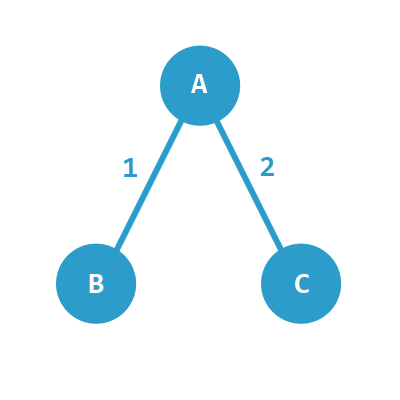

Para um grafo como este, com os elementos A, B e C, as conexões são:

A e B estão conectados com peso 1.

A e C estão conectados com o peso 2.

C & B não está conectado.

A Matriz de Adjeção ficaria assim:


    abc
  
   R:[0 1 2]  
   
   B:[1 0 0]
   
   C:[2 0 0]
   
   
   >Um grafo é uma que representação abstrata de um conjunto de objetos e das relações existentes entre eles. É definido por um conjunto de nós ou vértices, e pelas ligações ou arestas, que ligam pares de nós.
   
#### $\color{red}{\text{Componentes conectados}}$

É possível encontrar todos os elementos conectados usando o método **connected_components()**.

Exemplo:

In [8]:
import numpy as np
from scipy.sparse.csgraph import connected_components
from scipy.sparse import csr_matrix

arr = np.array([
  [0, 1, 2],
  [1, 0, 0],
  [2, 0, 0]
])

newarr = csr_matrix(arr)

print(connected_components(newarr))

(1, array([0, 0, 0]))


#### $\color{red}{\text{Dijkstra}}$

Usar o método **dijkstra** permite encontrar o caminho mais curto em um gráfico de um elemento para outro.

Aceita os seguintes argumentos:
- return_predecessors: boolean (True para retornar todo o caminho da travessia, caso contrário, False).
- índices: índice do elemento para retornar todos os caminhos desse elemento somente.
- limite: peso máximo do caminho.

Exemplo: (Encontrar o caminho mais curto do elemento 1 ao 2)

In [9]:
import numpy as np
from scipy.sparse.csgraph import dijkstra
from scipy.sparse import csr_matrix

arr = np.array([
  [0, 1, 2],
  [1, 0, 0],
  [2, 0, 0]
])

newarr = csr_matrix(arr)

print(dijkstra(newarr, return_predecessors=True, indices=0))

(array([0., 1., 2.]), array([-9999,     0,     0]))


#### $\color{red}{\text{Floyd Warshall}}$
Use o método **floyd_warshall()** para encontrar o caminho mais curto entre todos os pares de elementos.

Exemplo: (Encontrar o caminho mais curto entre todos os pares de elementos)

In [10]:
import numpy as np
from scipy.sparse.csgraph import floyd_warshall
from scipy.sparse import csr_matrix

arr = np.array([
  [0, 1, 2],
  [1, 0, 0],
  [2, 0, 0]
])

newarr = csr_matrix(arr)

print(floyd_warshall(newarr, return_predecessors=True))

(array([[0., 1., 2.],
       [1., 0., 3.],
       [2., 3., 0.]]), array([[-9999,     0,     0],
       [    1, -9999,     0],
       [    2,     0, -9999]]))


#### $\color{red}{\text{Bellman Ford}}$
O método **bellman_ford()** também pode encontrar o caminho mais curto entre todos os pares de elementos, mas também pode lidar com pesos negativos.

Exemplo:(Encontrar o caminho mais curto do elemento 1 ao 2 com o gráfico fornecido com um peso negativo)

In [11]:
import numpy as np
from scipy.sparse.csgraph import bellman_ford
from scipy.sparse import csr_matrix

arr = np.array([
  [0, -1, 2],
  [1, 0, 0],
  [2, 0, 0]
])

newarr = csr_matrix(arr)

print(bellman_ford(newarr, return_predecessors=True, indices=0))

(array([ 0., -1.,  2.]), array([-9999,     0,     0]))


#### $\color{red}{\text{Profundidade Primeira Ordem}}$
O método **depth_first_order()** retorna uma primeira travessia de profundidade de um nó.

Esta função recebe os seguintes argumentos:

- O gráfico.
- O elemento inicial para percorrer o gráfico.

Exemplo: (Percorrer a profundidade do gráfico para determinada matriz de adjacência)

In [12]:
import numpy as np
from scipy.sparse.csgraph import depth_first_order
from scipy.sparse import csr_matrix

arr = np.array([
  [0, 1, 0, 1],
  [1, 1, 1, 1],
  [2, 1, 1, 0],
  [0, 1, 0, 1]
])

newarr = csr_matrix(arr)

print(depth_first_order(newarr, 1))

(array([1, 0, 3, 2]), array([    1, -9999,     1,     0]))


#### $\color{red}{\text{Largura Primeira Ordem}}$
O método **breadth_first_order()** retorna um primeiro percurso de largura de um nó.

Esta função recebe os seguintes argumentos:
- O gráfico.
- O elemento inicial para percorrer o gráfico.

Exemplo: (Percorrer a largura do gráfico para determinada matriz de adjacência)

In [13]:
import numpy as np
from scipy.sparse.csgraph import breadth_first_order
from scipy.sparse import csr_matrix

arr = np.array([
  [0, 1, 0, 1],
  [1, 1, 1, 1],
  [2, 1, 1, 0],
  [0, 1, 0, 1]
])

newarr = csr_matrix(arr)

print(breadth_first_order(newarr, 1))

(array([1, 0, 2, 3]), array([    1, -9999,     1,     1]))


<img src="https://c.tenor.com/uNygGB5LME8AAAAC/death-spongebob.gif" width=300>

#### Para mais específicações: 
#### [ scipy.sparse.csr_matrix](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.sparse.csr_matrix.html ) 

#### [Sparse matrices (scipy.sparse) ](https://docs.scipy.org/doc/scipy/reference/sparse.html) 

#### [scipy.sparse.csr_matrix ](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html ) 

#### [scipy.sparse.csr_matrix.sum_duplicates ](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.sum_duplicates.html ) 

#### [scipy.sparse.csr_matrix.eliminate_zeros ](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.sparse.csr_matrix.eliminate_zeros.html ) 

#### [numpy.count_nonzero ](https://numpy.org/doc/stable/reference/generated/numpy.count_nonzero.html ) 

#### [scipy.sparse.csr_matrix.tocsc ](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.tocsc.html ) 

#### [Compressed sparse graph routines (scipy.sparse.csgraph) ](https://docs.scipy.org/doc/scipy/reference/sparse.csgraph.html ) 

#### [scipy.sparse.csgraph.connected_components ](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csgraph.connected_components.html ) 

#### [scipy.sparse.csgraph.dijkstra ](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csgraph.dijkstra.html ) 

#### [scipy.sparse.csgraph.floyd_warshall ](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csgraph.floyd_warshall.html ) 

#### [scipy.sparse.csgraph.bellman_ford ](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csgraph.bellman_ford.html ) 

#### [scipy.sparse.csgraph.depth_first_order ](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csgraph.depth_first_order.html ) 

#### [ scipy.sparse.csgraph.breadth_first_order](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csgraph.breadth_first_order.html) 
